# Decision Trees Lab

In this lab we will discover how to apply decision trees to regression and classification problems.

### 1: Build a regression tree

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](../../assets/datasets/used_cars.csv). Your goal is to predict Price for out-of-sample data. Here are your instructions:

1. Read the data into Pandas.
- Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Decide if you need additional splits along other features
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree on a piece of paper, making sure to label your leaves with the mean Price for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

Read the data into Pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('http://localhost:8888/files/GA-DSI-working/week-08/8.2.2-lab-CARTs/assets/datasets/used_cars.csv')

Explore the data by sorting, plotting, or split-apply-combine (aka group_by).

In [2]:
df

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [3]:
df.describe()

,price,year,miles,doors
count,14.000000,14.000000,14.000000,14.000000
mean,6571.428571,2004.857143,114464.285714,3.142857
std,6161.097376,4.382784,63198.242516,1.027105
min,1300.000000,1997.000000,13000.000000,2.000000
25%,2125.000000,2003.000000,64875.000000,2.000000
50%,3500.000000,2004.000000,131000.000000,4.000000
75%,9375.000000,2008.500000,162250.000000,4.000000
max,22000.000000,2012.000000,209000.000000,4.000000


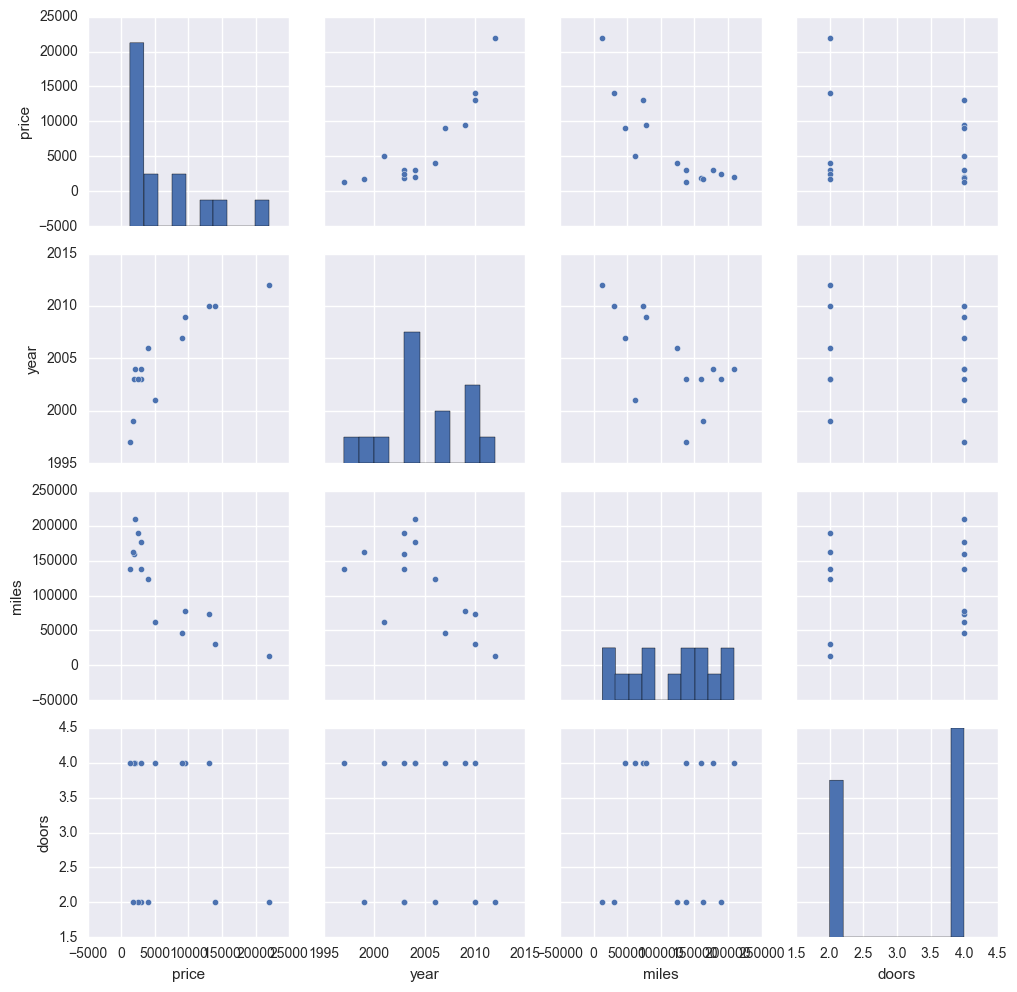

In [4]:
sns.pairplot(df)

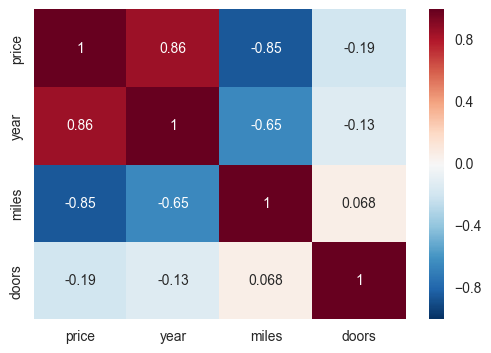

In [5]:
sns.heatmap(df.corr(), annot=True)

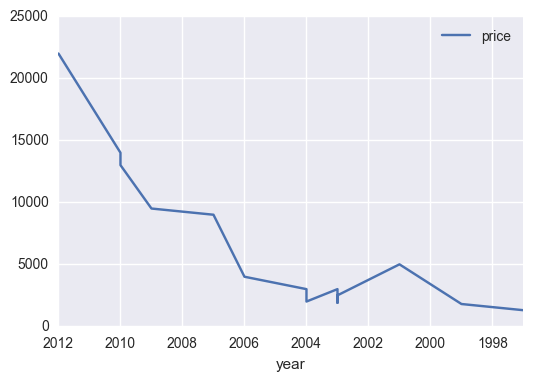

In [6]:
df.plot('year', 'price')

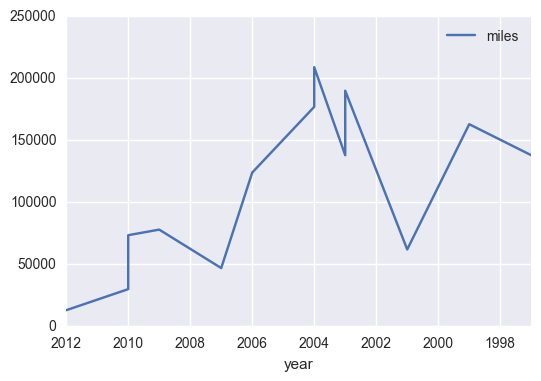

In [7]:
df.plot('year', 'miles')

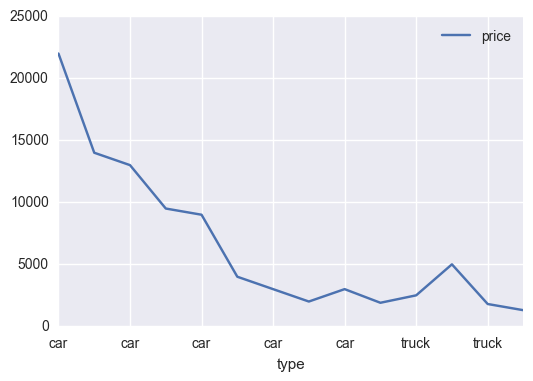

In [8]:
df.plot('type', 'price')

Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)

In [60]:
# I believe year is the most important predictor

- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.


- Decide if you need additional splits along other features


- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)

- You are allowed to split on the same variable multiple times!

- Draw your tree on a piece of paper, making sure to label your leaves with the mean Price for the observations in that "bucket".

- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

#### How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.


2: Build a regression tree in scikit-learn
Building a tree by hand was not so easy, and also not ideal. Let's use scikit-learn to build an optimal regression tree. Do the following:
Map the type column to a binary variable

In [9]:
df

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [10]:
#Map the type column to a binary variable
def binaryv(value):
    if value == 'car':
        return 1
    else:
        return 0
df['type2'] = df['type'].apply(binaryv)
# create function to create binary value of 1 for car, 0 for truck.
# applied this to new column titled 'type2'

In [63]:
# concatenated existing data frame with temporary cars df

In [11]:
df

,price,year,miles,doors,type,type2
0,22000,2012,13000,2,car,1
1,14000,2010,30000,2,car,1
2,13000,2010,73500,4,car,1
3,9500,2009,78000,4,car,1
4,9000,2007,47000,4,car,1
5,4000,2006,124000,2,car,1
6,3000,2004,177000,4,car,1
7,2000,2004,209000,4,truck,0
8,3000,2003,138000,2,car,1
9,1900,2003,160000,4,car,1


In [12]:
# Create a matrix `X` that contains the feature values and a vector `y` that contains the price values
X = df[['year', 'miles', 'doors', 'type2']]
y = df['price']

In [13]:
# - Split the data into train-test using a random state of 42 and test_size of 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [14]:
# - Import and initialize the `DecisionTreeRegressor` class from scikit-learn
from sklearn.tree import DecisionTreeRegressor
Tree = DecisionTreeRegressor()

In [15]:
# - Fit it to the training set
Tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [16]:
# - Predict the values of the test set
Predictions = Tree.predict(X_test)

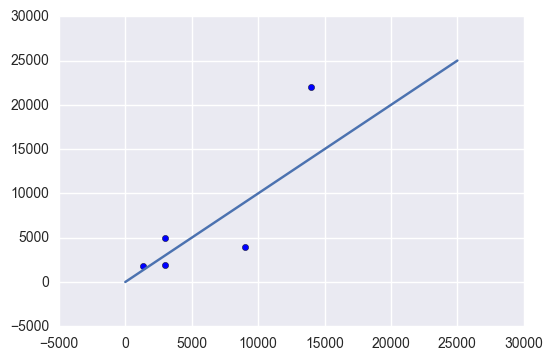

In [17]:
# - Display the predicted and actual values in a plot
plt.scatter(Predictions, y_test.values)
plt.plot([0, 25000],[0, 25000])

In [18]:
# - Use r2_score to judge the goodness of the regression
from sklearn.metrics import r2_score, mean_squared_error
print r2_score(y_test, Predictions) #70% of variation in price is described by variation in features
print mean_squared_error(y_test, Predictions) #mean deviation in a way, a lot wrong...$4,000 off

0.675430880453
18892000.0


### 3.b Global parameters

The `DecisionTreeRegressor` offers few global parameters that can be changed at initialization. For example one can set the `max_depth` or the `min_samples_leaf` parameters and impose global constraints on the space of solutions.

1. Use `cross_val_score` with 3-fold cross validation to find the optimal value for the `max_depth` (explore values 1 - 10). Note that you will have to set `scoring='mean_squared_error'` as criterion for score. Always set `random_state=1`
- Plot the error as a function of `max_depth`

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1,9):

IndentationError: expected an indented block (<ipython-input-20-39699a3f47dc>, line 4)

## 3.c Feature importances

The decision tree class exposes an attribute called `feature_importances_`.

1. Check the importance of each feature. what's the most important feature?

### 3.d Tree visualization

Follow the example in the [documentation](http://scikit-learn.org/stable/modules/tree.html) to visualize the tree.
You may have to install `pydot` and/or `graphviz` if you don't have them already.

#### Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- First line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- `samples` is the number of observations in that node
- `value` is the mean response value in that node
- `mse` is the mean squared error calculated by comparing the actual response values in that node against "value"

### Exercise 4: Use GridSearchCV to find te best Regression Tree

How do we know by pruning with max depth is the best model for us? Trees offer a variety of ways to pre-prune (that is, we tell a computer how to design the resulting tree with certain "gotchas").

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

1. Initialize reasonable ranges for all parameters and find the optimal combination using Grid Search.

## 4 Classification trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)

Here's an **example of a classification tree**, which predicts whether or not a patient who presented with chest pain has heart disease:

### 4.a Building a classification tree in scikit-learn
We'll build a classification tree using the [Car Dataset](./assets/datasets/cars.csv).

- Load the dataset in pandas
- Check for missing values
- Encode all the categorical features to booleans using `pd.get_dummies`
- Encode the labels using LabelEncoder
- Split X and y with train_test split like above
        train_test_split(X, y, test_size=0.3, random_state=42)
- Fit a classification tree with `max_depth=3` on all data
- Visualize the tree using graphviz
- Compute the feature importances
- Compute and display the confusion matrix
- Release the constraint of `max_depth=3` and see if the classification improves

### 4 Build a Random Forest - Friday Lab

In [22]:
# Load the dataset in pandas
from sklearn.ensemble import RandomForestClassifier
df

,price,year,miles,doors,type,type2
0,22000,2012,13000,2,car,1
1,14000,2010,30000,2,car,1
2,13000,2010,73500,4,car,1
3,9500,2009,78000,4,car,1
4,9000,2007,47000,4,car,1
5,4000,2006,124000,2,car,1
6,3000,2004,177000,4,car,1
7,2000,2004,209000,4,truck,0
8,3000,2003,138000,2,car,1
9,1900,2003,160000,4,car,1


In [24]:
X = df[['year', 'miles', 'doors', 'type2']]
y = df['price']


In [25]:
# Split X and y with train_test split like above
#   train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()

In [27]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
pred = rforest.predict(X_test)

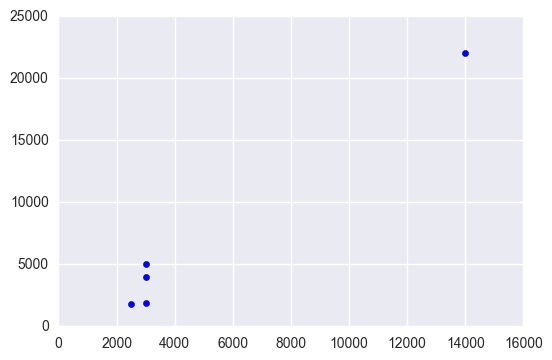

In [32]:
plt.scatter(pred, y_test.values)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
print 'r2 score', r2_score(y_test, pred)
print 'mean_squared_error' , mean_squared_error(y_test, pred)

r2 score 0.757071387339
mean_squared_error 14140000.0


In [ ]:
# ^^ Higher r2 compared to Regression Tree